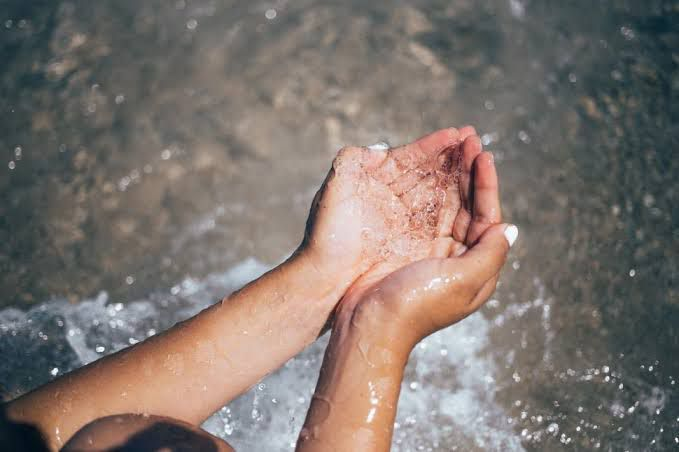

### 💧 Water Potability Prediction 

🔹 Problem:

-- To predict whether a given water sample is safe (potable) or not safe using chemical properties of water.

🔹 Objectives:

-- Understand water quality data.

-- Handle missing values and outliers.

-- Balance the dataset using SMOTE.

-- Train multiple machine learning models.

-- Evaluate and compare model performance.

-- Predict potability for real and synthetic samples.

## 📋 Table of Contents - Water Potability Prediction Project

### 1. Import Dependencies
- All required libraries and warnings filter

### 2. Load & Inspect Dataset
- Load CSV file
- `head()`, `shape`, `info()`, `describe()`

### 3. Data Cleaning
- Check & handle missing values (mean imputation)

### 4. Exploratory Data Analysis (EDA)
- **4.1** Boxplots  
- **4.2** Histograms  
- **4.3** Countplot (Target Distribution)  
- **4.4** Correlation Heatmap

### 5. Preprocessing
- Feature-target split  
- Train-test split  
- Scaling  
- SMOTE

### 6. Model Building
- Logistic Regression  
- Decision Tree (GridSearch)  
- Random Forest (GridSearch)  
- XGBoost (GridSearch)  
- SVM (GridSearch)

### 7. Model Evaluation
- **7.1** Accuracy Score  
- **7.2** Classification Report  
- **7.3** Confusion Matrix

### 8. Feature Importance
- Plots for LR, DT, RF, XGB

### 9. Model Performance Comparison
- **9.1** Stacked Bar Chart (Accuracy, Precision, Recall, F1 Score)  
- **9.2** ROC Curve Comparison

### 10. Make Predictions
- **10.1** Manual Safe Input  
- **10.2** Manual Unsafe Input  
- **10.3** Mixed Batch Prediction  
- **10.4** Random Test Samples  
- **10.5** Synthetic Sample Generation using `generate_sample()`
- **10.6** Prediction Summary Using Mixed Samples - SVM vs RF

### 11. Model Saving
- Save SVM model and scaler with `joblib`


**✅ Step 1: Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve

import warnings
warnings.filterwarnings("ignore")

**✅ Step 2: Load & Inspect Dataset**

In [8]:
# Load data
data = pd.read_csv(r"C:\Users\Kailash\Downloads\water_potability.csv")

In [9]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
data.shape

(3276, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**✅ Step 3: Data Cleaning**

In [14]:
# Check for missing values
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Out of all features, 3 columns have missing values - ph: acidity/alkalinity of water, Sulfate: mineral concentration, Trihalomethanes: disinfection by-products. All other features are complete.

In [16]:
# Fill missing values (mean strategy)
data['ph'].fillna(data['ph'].mean(), inplace=True)
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)

✅**Step 4:  Exploratory Data Analysis (EDA)**

- **4.1** Boxplots

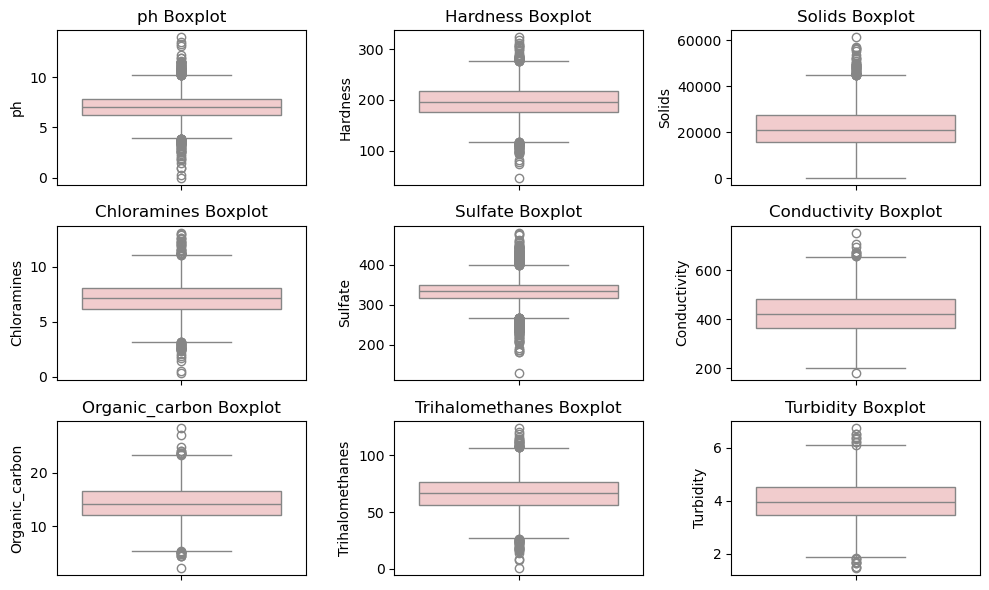

In [19]:
# Boxplots for each feature
plt.figure(figsize=(10,6))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[col], color='#F7C6C7')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

The figure above shows the boxplots of all numerical features in the dataset:

Objective: To detect outliers and understand the distribution of each feature.
Observation Highlights:
Outliers are present in most features, especially:
Solids, Conductivity, and Trihalomethanes show significant outliers (long whiskers and many dots).
pH, Chloramines, and Organic_carbon have relatively symmetrical distributions with a few mild outliers.
Box Widths reflect the spread of data (interquartile range). For instance, Solids has a very wide spread, indicating high variability.

- **4.2** Countplot (Target Distribution) 

In [22]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

The dataset is imbalanced, with more non-potable samples (1998) than potable ones (1278).
This imbalance can bias model predictions. Hence, SMOTE (Synthetic Minority Over-sampling Technique) was used during preprocessing to handle it.

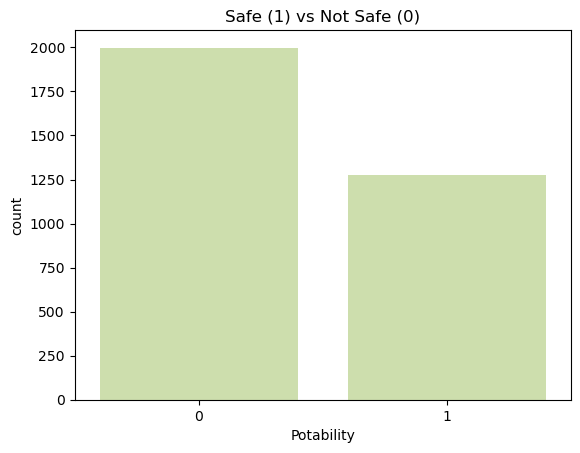

In [24]:
# Count plot of target variable
sns.countplot(x='Potability', data=data, color="#D0E6A5")
plt.title("Safe (1) vs Not Safe (0)")
plt.show()

This bar plot clearly highlights an imbalance in the dataset. There are significantly more non-potable water samples than potable ones.

- **4.3** Histograms

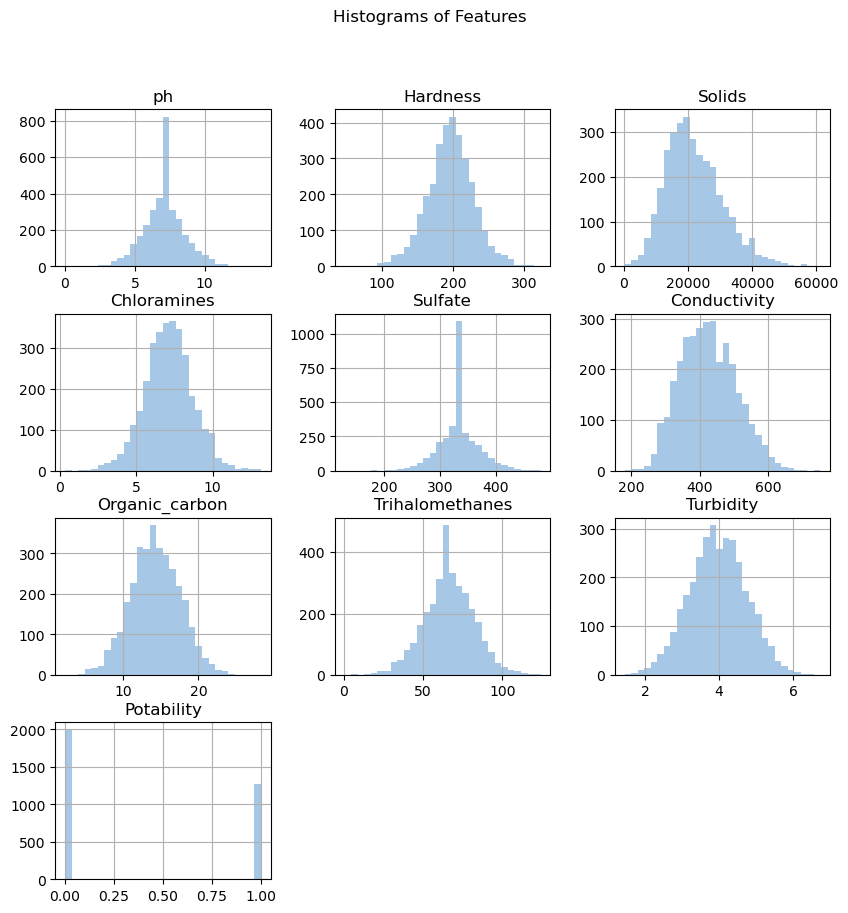

In [27]:
# Histograms
data.hist(figsize=(10,10), bins=30, color='#A7C7E7')
plt.suptitle("Histograms of Features")
plt.show()

Histograms below represent the frequency distribution of each feature in the dataset.These plots help identify the shape, spread, and any skewness in the data.

🔹 Key Observations:
ph: Fairly centered around 7, resembling a normal distribution, but a few samples with extreme values (<3 or >10).

Hardness & Chloramines: Appear normally distributed.

Solids & Conductivity: Right-skewed with some high-value outliers.

Sulfate: Shows a peak around 330–350, with slight right skew.

Organic_carbon & Trihalomethanes: Reasonably symmetric but with minor outliers.

Turbidity: Centered around 4, almost normal.

Potability (Target Variable): Clearly imbalanced with more samples labeled as Not Potable (0) than Potable (1).

These insights are crucial for choosing appropriate scaling techniques and deciding whether data balancing is needed before training models.

- **4.4** Correlation Heatmap

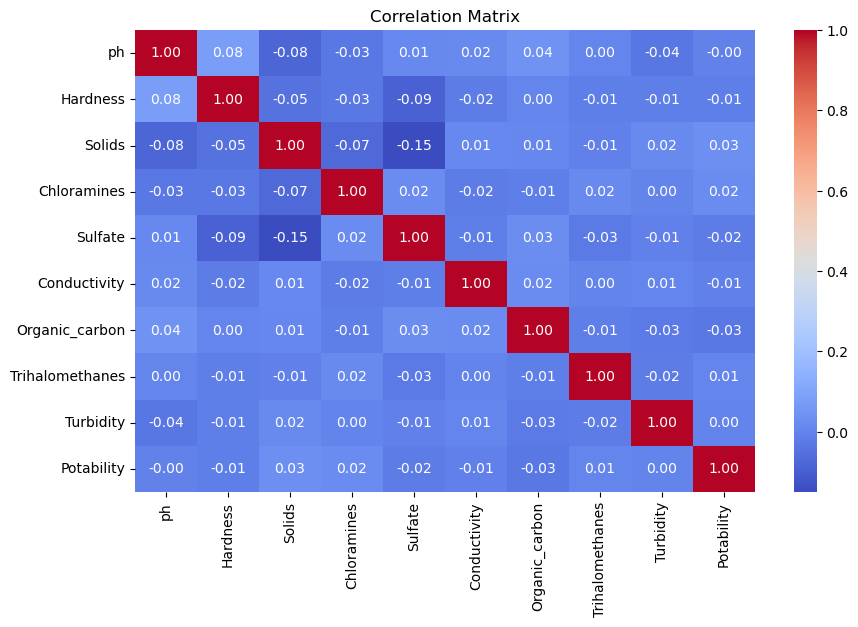

In [30]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix helps us understand the linear relationships between features in the dataset. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

🧩 Key Insights:

No strong correlations (close to ±1) exist between most features — indicating low multicollinearity.

Sulfate vs Solids: Slight negative correlation (~-0.15).

Solids vs Conductivity: Mild positive correlation, though still weak.

Target Variable (Potability):

Shows very weak correlations with all features (all < ±0.05), suggesting that non-linear models or feature combinations may be more effective.

This justifies using machine learning classifiers rather than relying on simple statistical thresholds.

**✅ Step 5:  Preprocessing**
- Feature-target split  
- Train-test split  
- Scaling  
- SMOTE

In [33]:
# Split features and target
X = data.drop("Potability", axis=1)
y = data["Potability"]

# Train-test split (stratify keeps the balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

This code prepares the data for model training in three main steps:

🔹 Train-Test Split:
The dataset is split into features (X) and target (y), and then into training and testing sets using train_test_split. The stratify=y ensures that the proportion of safe and unsafe water is maintained in both sets.

🔹 Feature Scaling:
StandardScaler is used to normalize the feature values so that all features contribute equally during model training, improving accuracy and convergence.

🔹 SMOTE (Synthetic Minority Over-sampling Technique):
SMOTE is applied to the training data to fix the class imbalance by generating synthetic examples of the minority class (Potability = 1), helping models learn better from underrepresented cases.

**✅ Step 6: Model Building**
- Logistic Regression  
- Decision Tree (GridSearch)  
- Random Forest (GridSearch)  
- XGBoost (GridSearch)  
- SVM (GridSearch)

In [36]:
# Defining models and hyperparameters
models = {}
scores = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
scores['Logistic Regression'] = cross_val_score(lr, X_train_res, y_train_res, cv=5)
models['Logistic Regression'] = lr

# Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
                       cv=5)
grid_dt.fit(X_train_res, y_train_res)
models['Decision Tree'] = grid_dt.best_estimator_
scores['Decision Tree'] = grid_dt.best_score_

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5]},
                       cv=5)
grid_rf.fit(X_train_res, y_train_res)
models['Random Forest'] = grid_rf.best_estimator_
scores['Random Forest'] = grid_rf.best_score_

# XGBoost
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.05, 0.1]},
                        cv=5)
grid_xgb.fit(X_train_res, y_train_res)
models['XGBoost'] = grid_xgb.best_estimator_
scores['XGBoost'] = grid_xgb.best_score_

# SVM
grid_svm = GridSearchCV(SVC(probability=True, random_state=42),
                        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
                        cv=5)
grid_svm.fit(X_train_res, y_train_res)
models['SVM'] = grid_svm.best_estimator_
scores['SVM'] = grid_svm.best_score_

This section trains and tunes five machine learning models:

🔹 Logistic Regression:
A basic linear model trained with max_iter=1000, evaluated using 5-fold cross-validation.

🔹 Decision Tree:
Trained with hyperparameter tuning (max_depth, min_samples_split) using GridSearchCV to find the best combination.

🔹 Random Forest:
An ensemble model with class_weight='balanced' to handle imbalance, tuned using grid search on depth, estimators, and split size.

🔹 XGBoost:
A powerful gradient boosting model tuned for n_estimators, max_depth, and learning_rate, with log-loss as the evaluation metric.

🔹 SVM:
Support Vector Machine optimized using grid search over kernel type, regularization (C), and gamma values.

All models are trained on the SMOTE-resampled and scaled training data and stored in a dictionary along with their average cross-validation scores.

**✅ Step 7: Model Evaluation**
- Accuracy Score  
- Classification Report  
- Confusion Matrix

In [39]:
for name, model in models.items():
    print(f"\n -- {name} --")
    y_pred = model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 -- Logistic Regression --
Accuracy: 0.5259146341463414
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       400
           1       0.42      0.54      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656

Confusion Matrix:
 [[208 192]
 [119 137]]

 -- Decision Tree --
Accuracy: 0.586890243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       400
           1       0.48      0.57      0.52       256

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.59      0.59       656

Confusion Matrix:
 [[239 161]
 [110 146]]

 -- Random Forest --
Accuracy: 0.6539634146341463
Classification Report:
               precision    recal

🔹 Logistic Regression

Lowest accuracy (~52%) among all models.

Simple linear model, struggled to capture complex patterns in the data.

Even after scaling and SMOTE, it couldn’t handle non-linear relationships well.

🔹 Decision Tree

Slight improvement over Logistic Regression (~58% accuracy).

Captured some non-linear patterns.

However, prone to overfitting and did not generalize well, even after class balancing.

🔹 Random Forest

Achieved highest accuracy (~65%) among all models.

Strong at capturing patterns from both classes, but performance dropped slightly on minority class (potable water).

🔹 XGBoost

Good performance (~62% accuracy), close to RF.

More robust than DT but sensitive to parameter tuning.

Handled the imbalance moderately well, but still favored the majority class slightly.

🔹 SVM (Support Vector Machine)

Slightly lower accuracy (~60%) than RF, but showed more balanced performance.

Benefited from feature scaling (StandardScaler) and class balancing (SMOTE), which are crucial for SVM.

Handled the imbalance well and provided stable results on both classes.



**✅ Step 8: Feature Importance**

- **8.1** Plot for Logistic Regression Model

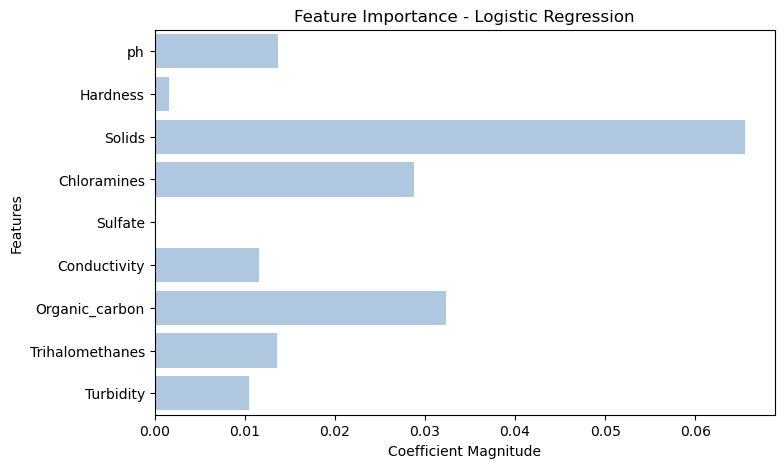

In [43]:
#features importances

features = X.columns
import numpy as np

importances_lr = np.abs(lr.coef_[0])

plt.figure(figsize=(8,5))
sns.barplot(x=importances_lr, y=features, color = "#A7C7E7")
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

This bar chart shows the feature importance in Logistic Regression based on coefficient magnitude (how much each feature contributes to the model’s prediction):

🔹 Insights:

Solids is the most influential feature for predicting water potability in Logistic Regression.

Organic_carbon and Chloramines also play a significant role.

Features like Hardness, Turbidity, and Conductivity have lower importance.

Since Logistic Regression is a linear model, it uses the magnitude of coefficients to assign importance (higher magnitude = more impact on prediction).

- **8.2** Plot for Decision Tree Model

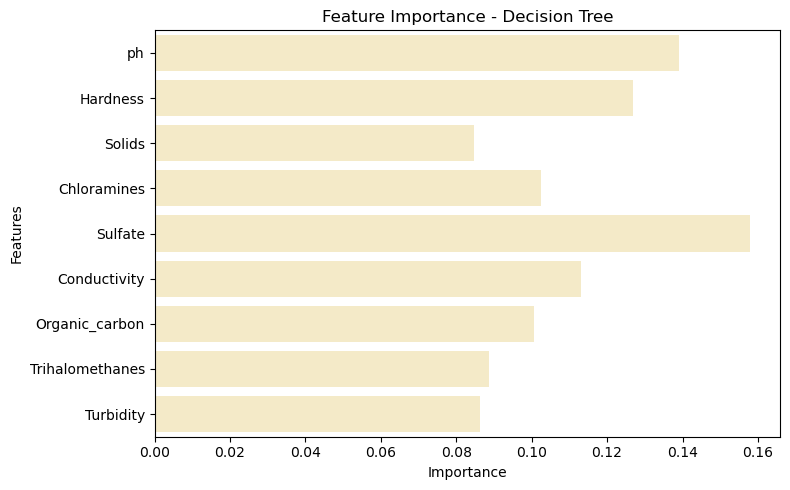

In [46]:
dt = models['Decision Tree']
importances_dt = dt.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_dt, y=features, color = "#FBEEC1")
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

🔸 Decision Tree – Feature Importance

Top feature: Sulfate, followed by pH, Hardness, and Conductivity.

Almost all features contributed significantly, showing the model’s ability to capture complex patterns.

Feature importance in decision trees is based on how often and how effectively a feature splits the data.

Unlike Logistic Regression, Decision Tree considered even Turbidity and Trihalomethanes as relatively impactful.

- **8.3** Plot for Random Forest Model

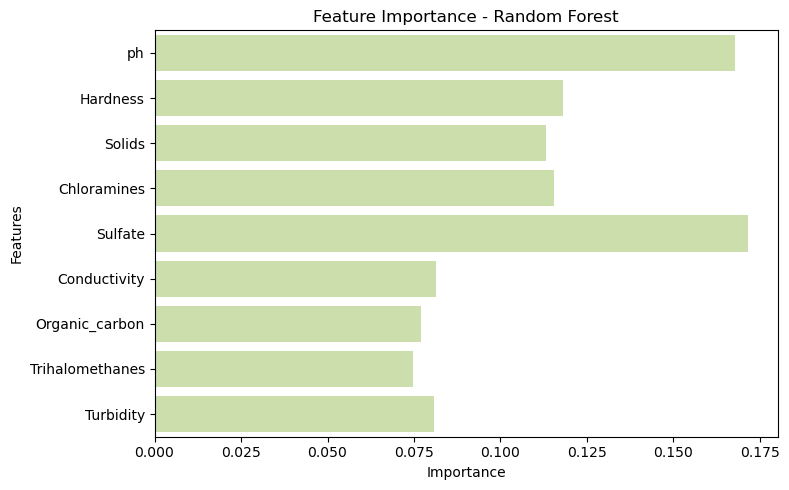

In [49]:
rf = models['Random Forest']
importances_rf = rf.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_rf, y=features, color="#D0E6A5")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

🟢 Random Forest – Feature Importance

Top features: Sulfate and pH had the highest impact on prediction.

Hardness, Solids, and Chloramines also played significant roles.

Less impact seen from Organic_carbon, Trihalomethanes, and Conductivity.

Random Forest captures non-linear patterns and interactions, giving a more balanced importance spread across features.



- **8.4** Plot for XGBoost Model

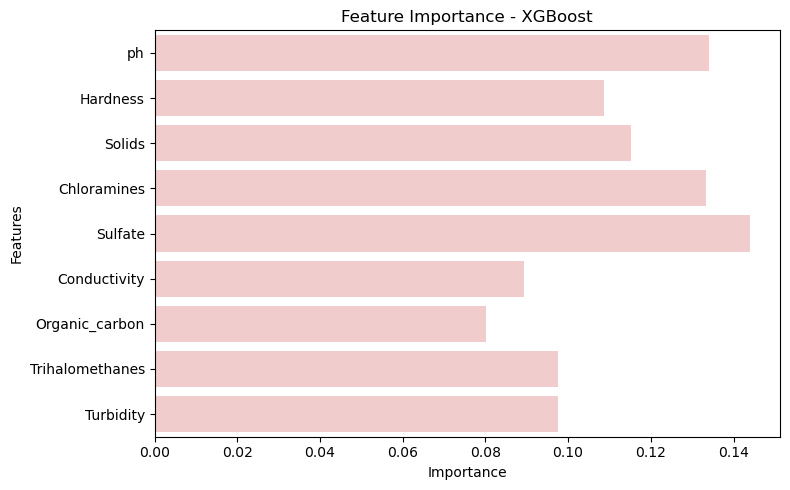

In [52]:
xgb = models['XGBoost']
importances_xgb = xgb.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_xgb, y=features, color="#F7C6C7")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

🔴 XGBoost – Feature Importance

Most influential features: Sulfate, pH, and Chloramines.

Hardness, Solids, and Turbidity also showed notable importance.

Organic_carbon and Conductivity had relatively less impact.

XGBoost handles complex patterns and emphasizes important splits, giving it a fine-grained view of feature roles.



**✅ Step 9: Model Performance Comparison**

- **9.1** Stacked Bar Chart (Accuracy, Precision, Recall, F1 Score)

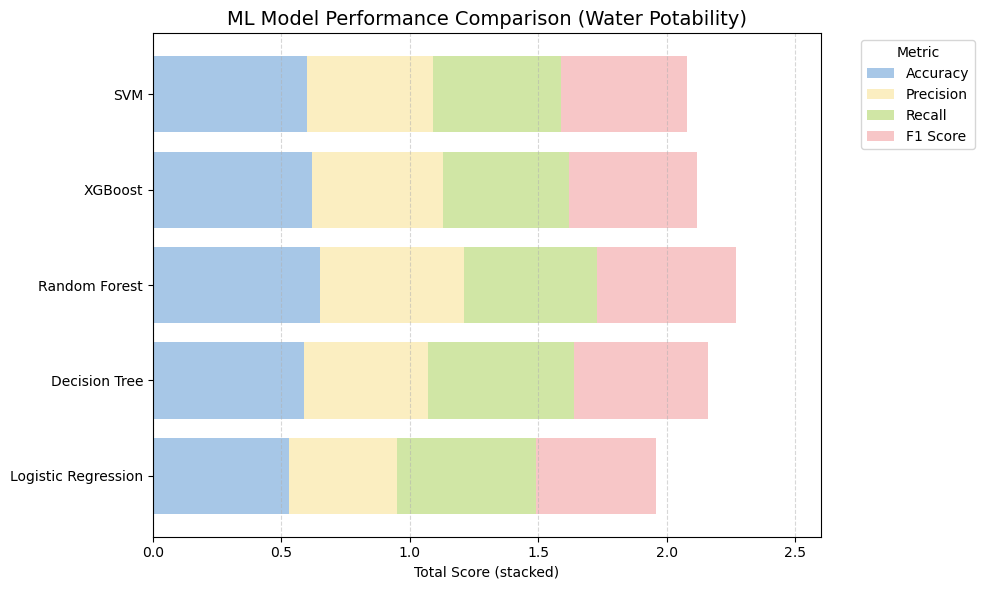

In [56]:
# Data: [Accuracy, Precision, Recall, F1 Score]
model_scores = {
    "Logistic Regression": [0.53, 0.42, 0.54, 0.47],
    "Decision Tree":       [0.59, 0.48, 0.57, 0.52],
    "Random Forest":       [0.65, 0.56, 0.52, 0.54],
    "XGBoost":             [0.62, 0.51, 0.49, 0.50],
    "SVM":                 [0.60, 0.49, 0.50, 0.49]
}

# Creating DataFrame
df = pd.DataFrame(model_scores, index=["Accuracy", "Precision", "Recall", "F1 Score"])

# Plot
plt.figure(figsize=(10, 6))
colors = ["#A7C7E7", "#FBEEC1", "#D0E6A5", "#F7C6C7"]

for i, metric in enumerate(df.index):
    plt.barh(df.columns, df.loc[metric], left=df.iloc[:i].sum(), label=metric, color=colors[i])

plt.title("ML Model Performance Comparison (Water Potability)", fontsize=14)
plt.xlabel("Total Score (stacked)")
plt.xlim(0, 2.6)  # 4 metrics max 1.0
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

All model performances have been visually compared using a grouped bar chart covering Accuracy, Precision, Recall, and F1 Score.

- **9.2** ROC Curve Comparison

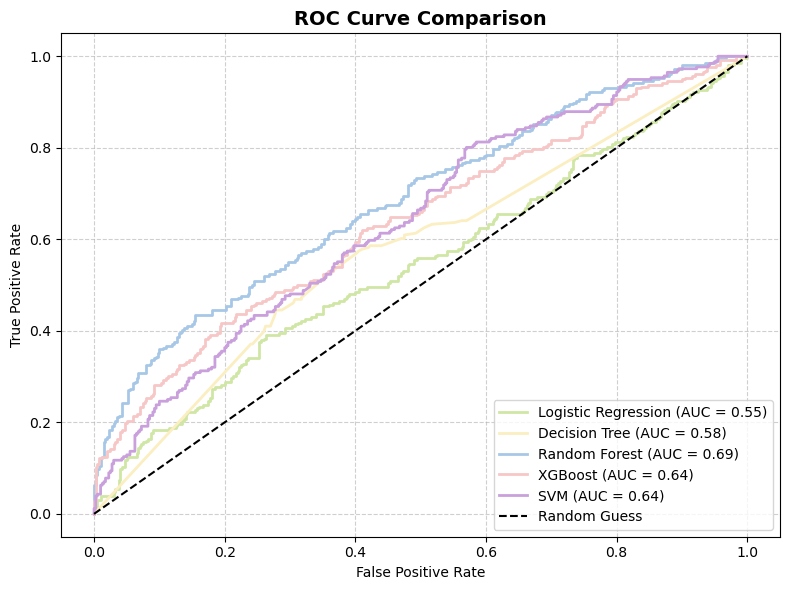

In [59]:
# Defining custom pastel color palette
colors = ["#D0E6A5", "#FBEEC1", "#A7C7E7", "#F7C6C7", "#C9A0DC"]

plt.figure(figsize=(8, 6))

#Each model's ROC curve using custom colors
for idx, (name, model) in enumerate(models.items()):
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    color = colors[idx % len(colors)]  # Safe in case there are more models
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", color=color, linewidth=2)

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The ROC curve provides a graphical comparison of the classification capabilities of each model.
Models like Random Forest and SVM achieved higher AUC scores, indicating better performance in distinguishing between safe and unsafe water. 
This visual tool helps evaluate how well each model handles class predictions.



**✅ Step 10: Making Predictions**

- **10.1** Manual Safe Input 

In [63]:
def predict_water_quality(model, sample):
    sample_scaled = scaler.transform(sample)
    pred = model.predict(sample_scaled)[0]
    prob = model.predict_proba(sample_scaled)[0]
    return "Safe" if pred == 1 else "Not Safe", prob

# Example Input 
sample = np.array([[7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0]])
result, prob = predict_water_quality(models['SVM'], sample)
print(f" Input Sample: {sample.tolist()[0]}")
print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
print(f" Final Prediction: {result}")

 Input Sample: [7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0]
 Probabilities → Not Safe: 0.41, Safe: 0.59
 Final Prediction: Safe


In [64]:
safe_samples = np.array([
    [7.5, 190, 21000, 6.9, 350, 430, 14.2, 67, 3.8],
    [7.0, 205, 18000, 7.1, 345, 410, 13.0, 63, 4.2],
    [6.8, 180, 20000, 6.8, 330, 400, 12.5, 60, 4.0]
])

for i, s in enumerate(safe_samples):
    result, prob = predict_water_quality(models['SVM'], s.reshape(1, -1))
    print(f"\n Sample {i+1}: {s.tolist()}")
    print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
    print(f" Prediction: {result}")


 Sample 1: [7.5, 190.0, 21000.0, 6.9, 350.0, 430.0, 14.2, 67.0, 3.8]
 Probabilities → Not Safe: 0.49, Safe: 0.51
 Prediction: Safe

 Sample 2: [7.0, 205.0, 18000.0, 7.1, 345.0, 410.0, 13.0, 63.0, 4.2]
 Probabilities → Not Safe: 0.34, Safe: 0.66
 Prediction: Safe

 Sample 3: [6.8, 180.0, 20000.0, 6.8, 330.0, 400.0, 12.5, 60.0, 4.0]
 Probabilities → Not Safe: 0.45, Safe: 0.55
 Prediction: Safe


- **10.2** Manual Unsafe Input

In [66]:
# unsafe input samples (based on extreme unhealthy values)
unsafe_samples = np.array([
    [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5],  # very high solids, low pH, high THM
    [2.9, 65.0, 58000.0, 0.8, 180.0, 190.0, 23.0, 115.0, 6.0],  # very acidic, high organic and THM
    [3.5, 80.0, 47000.0, 0.5, 160.0, 210.0, 24.5, 110.0, 6.2]   # disinfection & clarity issues
])

# predictions using your SVM model
for i, s in enumerate(unsafe_samples):
    result, prob = predict_water_quality(models['SVM'], s.reshape(1, -1))
    print(f"\n Unsafe Sample {i+1}: {s.tolist()}")
    print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
    print(f" Prediction: {result}")


 Unsafe Sample 1: [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Unsafe Sample 2: [2.9, 65.0, 58000.0, 0.8, 180.0, 190.0, 23.0, 115.0, 6.0]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Unsafe Sample 3: [3.5, 80.0, 47000.0, 0.5, 160.0, 210.0, 24.5, 110.0, 6.2]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe


- **10.3** Mixed Batch Prediction

In [68]:
# Mixed samples: some safe, some unsafe
mixed_samples = np.array([
    #  Expected Safe (values within normal healthy range)
    [7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0],
    [7.0, 205.0, 18500.0, 7.2, 345.0, 410.0, 13.0, 63.0, 4.2],
    
    #  Expected Unsafe (extreme or unhealthy values)
    [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5],
    [2.8, 60.0, 58000.0, 0.8, 130.0, 190.0, 24.0, 110.0, 6.2],
    
    #  Expected Safe
    [6.9, 195.0, 20000.0, 7.1, 335.0, 400.0, 12.7, 60.0, 3.9],
    
    #  Expected Unsafe
    [3.0, 70.0, 49000.0, 0.7, 160.0, 210.0, 22.5, 115.0, 6.0]
])

# Prediction using your preferred model 
for i, s in enumerate(mixed_samples):
    result, prob = predict_water_quality(models['SVM'], s.reshape(1, -1))
    print(f"\n Sample {i+1}: {s.tolist()}")
    print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
    print(f" Prediction: {result}")



 Sample 1: [7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0]
 Probabilities → Not Safe: 0.41, Safe: 0.59
 Prediction: Safe

 Sample 2: [7.0, 205.0, 18500.0, 7.2, 345.0, 410.0, 13.0, 63.0, 4.2]
 Probabilities → Not Safe: 0.35, Safe: 0.65
 Prediction: Safe

 Sample 3: [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Sample 4: [2.8, 60.0, 58000.0, 0.8, 130.0, 190.0, 24.0, 110.0, 6.2]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Sample 5: [6.9, 195.0, 20000.0, 7.1, 335.0, 400.0, 12.7, 60.0, 3.9]
 Probabilities → Not Safe: 0.44, Safe: 0.56
 Prediction: Safe

 Sample 6: [3.0, 70.0, 49000.0, 0.7, 160.0, 210.0, 22.5, 115.0, 6.0]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe


- **10.4** Random Test Samples 

In [70]:
def predict_random_samples(model, X_test, y_test, n=5, threshold=0.5):
    indices = random.sample(range(len(X_test)), n)
    samples = X_test[indices]
    true_labels = y_test.iloc[indices].values
    probs = model.predict_proba(samples)
    preds = (probs[:, 1] >= threshold).astype(int)

    for i in range(n):
        print(f" Sample {i+1}:")
        print(f" Input → {samples[i]}")
        print(f" Probability → Not Safe: {probs[i][0]:.2f}, Safe: {probs[i][1]:.2f}")
        print(f" Predicted: {'Safe' if preds[i]==1 else 'Not Safe'} | Actual: {'Safe' if true_labels[i]==1 else 'Not Safe'}")
        print("─" * 70)

# Example usage:
# Converting scaled test data to array 
X_test_array = X_test_scaled if isinstance(X_test_scaled, np.ndarray) else X_test_scaled.to_numpy()

# predictions on random 5 samples using best model 
predict_random_samples(models["SVM"], X_test_array, y_test, n=5)

 Sample 1:
 Input → [ 1.06160071  0.15072063  1.21973661  1.77807678 -0.00445694 -1.10490367
 -0.30680187  0.00466758 -0.82100159]
 Probability → Not Safe: 0.42, Safe: 0.58
 Predicted: Safe | Actual: Safe
──────────────────────────────────────────────────────────────────────
 Sample 2:
 Input → [-0.00403084 -0.46415834 -0.83442346 -1.05152824 -0.00445694 -1.47196043
 -1.43438934 -0.37620492  0.24092312]
 Probability → Not Safe: 0.27, Safe: 0.73
 Predicted: Safe | Actual: Not Safe
──────────────────────────────────────────────────────────────────────
 Sample 3:
 Input → [-0.49934662  1.48095901 -0.91675757  1.29029999 -0.00445694 -0.30094977
 -0.53174974 -0.45014434  0.23290635]
 Probability → Not Safe: 0.45, Safe: 0.55
 Predicted: Safe | Actual: Not Safe
──────────────────────────────────────────────────────────────────────
 Sample 4:
 Input → [ 2.32547194 -2.16188885  1.90870392  0.9970452  -0.00445694  3.04624528
 -1.38307509 -0.91551215  1.79016529]
 Probability → Not Safe: 0.92, Sa

- **10.5** Synthetic Sample Generation using `generate_sample()`

In [72]:
# Defining random safe and unsafe sample generators
def generate_sample(safe=True):
    if safe:
        return np.array([
            round(np.random.uniform(6.5, 8.0), 1),     # pH
            round(np.random.uniform(180, 220), 1),     # Hardness
            round(np.random.uniform(15000, 22000), 1), # Solids
            round(np.random.uniform(6.8, 7.5), 1),     # Chloramines
            round(np.random.uniform(330, 370), 1),     # Sulfate
            round(np.random.uniform(390, 440), 1),     # Conductivity
            round(np.random.uniform(11.5, 14.5), 1),   # Organic_carbon
            round(np.random.uniform(55, 70), 1),       # Trihalomethanes
            round(np.random.uniform(3.5, 4.5), 1)      # Turbidity
        ])
    else:
        return np.array([
            round(np.random.uniform(2.5, 5.0), 1),     # pH
            round(np.random.uniform(40, 120), 1),      # Hardness
            round(np.random.uniform(45000, 60000), 1), # Solids
            round(np.random.uniform(0.5, 2.5), 1),     # Chloramines
            round(np.random.uniform(100, 200), 1),     # Sulfate
            round(np.random.uniform(150, 250), 1),     # Conductivity
            round(np.random.uniform(20, 30), 1),       # Organic_carbon
            round(np.random.uniform(90, 130), 1),      # Trihalomethanes
            round(np.random.uniform(5.5, 7.0), 1)      # Turbidity
        ])

# Generating 6 samples (3 safe + 3 unsafe)
random_samples = np.array([
    generate_sample(safe=True),
    generate_sample(safe=True),
    generate_sample(safe=True),
    generate_sample(safe=False),
    generate_sample(safe=False),
    generate_sample(safe=False),
])

# Prediction 
for i, s in enumerate(random_samples):
    result, prob = predict_water_quality(models['SVM'], s.reshape(1, -1))
    print(f"\n Random Sample {i+1}: {s.tolist()}")
    print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
    print(f" Prediction: {result}")


 Random Sample 1: [7.1, 199.0, 21329.0, 7.2, 332.0, 407.3, 13.0, 68.1, 3.9]
 Probabilities → Not Safe: 0.49, Safe: 0.51
 Prediction: Safe

 Random Sample 2: [7.9, 197.8, 15518.4, 7.0, 342.6, 404.1, 11.7, 64.0, 3.8]
 Probabilities → Not Safe: 0.55, Safe: 0.45
 Prediction: Not Safe

 Random Sample 3: [7.4, 196.9, 21794.8, 7.4, 345.5, 402.7, 12.5, 55.4, 4.2]
 Probabilities → Not Safe: 0.41, Safe: 0.59
 Prediction: Safe

 Random Sample 4: [3.7, 70.2, 56801.2, 2.4, 136.2, 198.8, 25.4, 103.5, 6.3]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Random Sample 5: [3.8, 100.8, 47934.5, 0.9, 162.9, 199.3, 28.0, 121.7, 6.0]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Prediction: Not Safe

 Random Sample 6: [3.0, 75.8, 48439.0, 0.9, 103.0, 188.5, 21.4, 129.9, 6.3]
 Probabilities → Not Safe: 0.52, Safe: 0.48
 Prediction: Not Safe


- **10.6** Prediction Summary Using Mixed Samples - SVM vs RF

In [74]:
#  Mixed Samples (expected outcomes)
mixed_samples = np.array([
    [7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0],   #  Safe
    [7.0, 205.0, 18500.0, 7.2, 345.0, 410.0, 13.0, 63.0, 4.2],   #  Safe
    [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5],   #  Not Safe
    [2.8, 60.0, 58000.0, 0.8, 130.0, 190.0, 24.0, 110.0, 6.2],   #  Not Safe
    [6.9, 195.0, 20000.0, 7.1, 335.0, 400.0, 12.7, 60.0, 3.9],   #  Safe
    [3.0, 70.0, 49000.0, 0.7, 160.0, 210.0, 22.5, 115.0, 6.0]    #  Not Safe
])

expected_labels = ["Safe", "Safe", "Not Safe", "Not Safe", "Safe", "Not Safe"]
models_to_compare = ["Random Forest", "SVM"]

#  Prediction Function
def predict_water_quality(model, sample, threshold=0.5):
    sample_scaled = scaler.transform(sample)
    prob = model.predict_proba(sample_scaled)[0]
    pred = int(prob[1] >= threshold)
    return "Safe" if pred == 1 else "Not Safe", prob

# predictions for both models
correct_counts = {}

for model_name in models_to_compare:
    print(f"\n Predictions from {model_name}:\n")
    correct = 0
    for i, s in enumerate(mixed_samples):
        result, prob = predict_water_quality(models[model_name], s.reshape(1, -1))
        expected = expected_labels[i]
        print(f" Sample {i+1}: {s.tolist()}")
        print(f" Probabilities → Not Safe: {prob[0]:.2f}, Safe: {prob[1]:.2f}")
        print(f" Expected: {expected} |  Predicted: {result}")
        print("─" * 60)
        if result == expected:
            correct += 1
    correct_counts[model_name] = correct

#  Summary of Correct Predictions
print("\n Correct Predictions Summary:")
for model, count in correct_counts.items():
    print(f"{model}: {count}/6 correct")

#  Conclusion
best_model = max(correct_counts, key=correct_counts.get)
print(f"\n Based on prediction accuracy on real-world-like samples, the preferred model is: **{best_model}**")


 Predictions from Random Forest:

 Sample 1: [7.2, 200.0, 18000.0, 7.0, 340.0, 420.0, 13.5, 65.0, 4.0]
 Probabilities → Not Safe: 0.51, Safe: 0.49
 Expected: Safe |  Predicted: Not Safe
────────────────────────────────────────────────────────────
 Sample 2: [7.0, 205.0, 18500.0, 7.2, 345.0, 410.0, 13.0, 63.0, 4.2]
 Probabilities → Not Safe: 0.49, Safe: 0.51
 Expected: Safe |  Predicted: Safe
────────────────────────────────────────────────────────────
 Sample 3: [3.2, 75.0, 50000.0, 0.6, 150.0, 200.0, 25.0, 120.0, 6.5]
 Probabilities → Not Safe: 0.59, Safe: 0.41
 Expected: Not Safe |  Predicted: Not Safe
────────────────────────────────────────────────────────────
 Sample 4: [2.8, 60.0, 58000.0, 0.8, 130.0, 190.0, 24.0, 110.0, 6.2]
 Probabilities → Not Safe: 0.59, Safe: 0.41
 Expected: Not Safe |  Predicted: Not Safe
────────────────────────────────────────────────────────────
 Sample 5: [6.9, 195.0, 20000.0, 7.1, 335.0, 400.0, 12.7, 60.0, 3.9]
 Probabilities → Not Safe: 0.50, Safe: 0

**✅ Step 11: Save Model & Scaler**

In [76]:
# svm is trained model and scaler is the StandardScaler
model_path = joblib.dump(models['SVM'], 'model.pkl')
scaler_path = joblib.dump(scaler, 'scaler.pkl')
print("Saved:", model_path, scaler_path)

Saved: ['model.pkl'] ['scaler.pkl']


Conclusion :

After selecting the best-performing model based on evaluation metrics, we applied it to predict the potability of new, unseen water samples. This step simulates how the model would work in a real-world setting to classify whether water is safe for drinking or not. By using the scaler and model saved during training, ensured consistent preprocessing and reliable predictions.

The final SVM model was deployed via a Streamlit app, allowing users to enter water parameters and get real-time potability predictions through an easy-to-use web interface.